In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
df2=pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

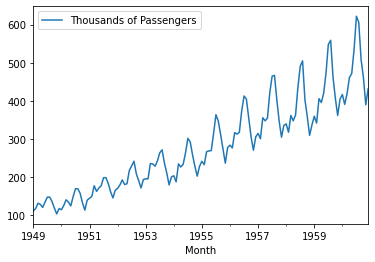

In [5]:
df1.plot(); #Non Seasonal

# Augmented Dicky-Fuller Test

In [7]:
from statsmodels.tsa.stattools import adfuller

In [19]:
test=adfuller(df1['Thousands of Passengers'])
out=pd.Series(test[:4],index=['adf test statistics','p-value','used_lag','n_obs'])
for k,v in test[4].items():
    out[f"Critical_value_{k}"]=v
out

adf test statistics      0.815369
p-value                  0.991880
used_lag                13.000000
n_obs                  130.000000
Critical_value_1%       -3.481682
Critical_value_5%       -2.884042
Critical_value_10%      -2.578770
dtype: float64

In [25]:
from statsmodels.tsa.stattools import adfuller
def adf_test(time_series):
    """
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
    root, with the alternative that there is no unit root. If the pvalue is
    above a critical size, then we cannot reject that there is a unit root.
    """
    test=adfuller(time_series)
    out=pd.Series(test[:4],index=['adf test statistics','p-value','used_lag','n_obs'])
    for k,v in test[4].items():
        out[f"Critical_value_{k}"]=v
    
    if out[1]<0.05:
        print('Stationary data')
    else:
        print('Non-Stationary data')
    return out

In [26]:
adf_test(df1)

Non-Stationary data


adf test statistics      0.815369
p-value                  0.991880
used_lag                13.000000
n_obs                  130.000000
Critical_value_1%       -3.481682
Critical_value_5%       -2.884042
Critical_value_10%      -2.578770
dtype: float64

In [27]:
adf_test(df2)

Stationary data


adf test statistics     -4.808291
p-value                  0.000052
used_lag                 6.000000
n_obs                  358.000000
Critical_value_1%       -3.448749
Critical_value_5%       -2.869647
Critical_value_10%      -2.571089
dtype: float64

# Granger Causality Test

In [29]:
df3=pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df3.index.freq='MS'

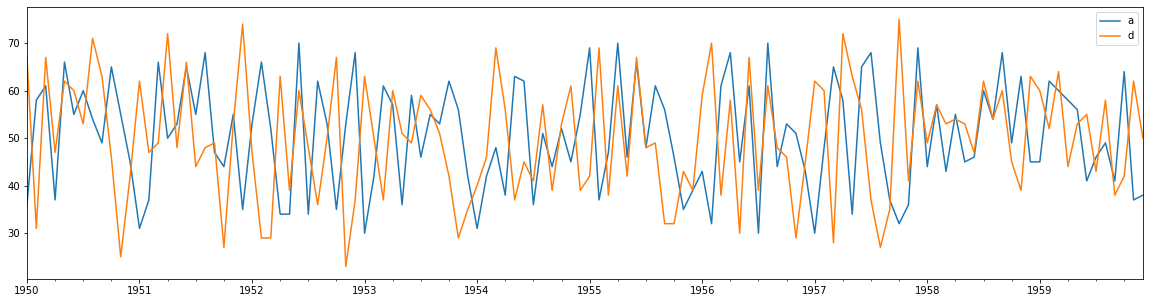

In [31]:
df3[['a','d']].plot(figsize=(20,5)); #its not clear if there is any Causality..lets shift this

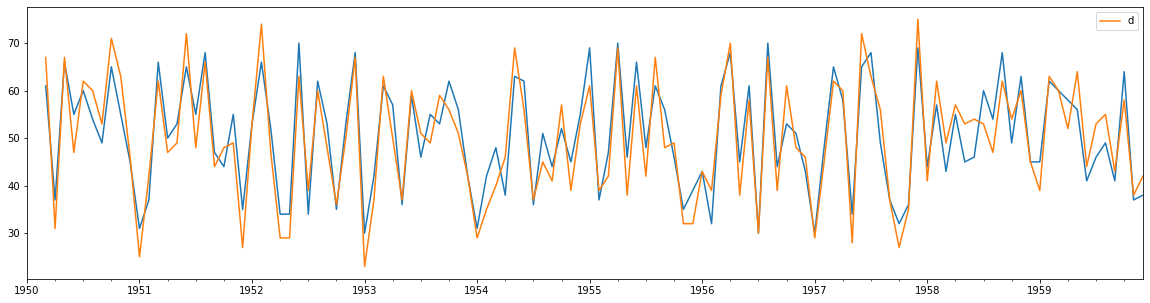

In [37]:
# Now we can see the correlations/Causality
df3['a'].iloc[2:].plot(figsize=(20,5))
df3['d'].shift(2).plot(legend=True);

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests

In [38]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


p value is significant at lag 2

# Evaluation using Statsmodels

In [42]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [43]:
df_rand=pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['actual','predicted'])

In [47]:
mse(df_rand.actual,df_rand.predicted),rmse(df_rand.actual,df_rand.predicted),meanabs(df_rand.actual,df_rand.predicted)

(23.0, 4.795831523312719, 4.2)

# plotting

In [48]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

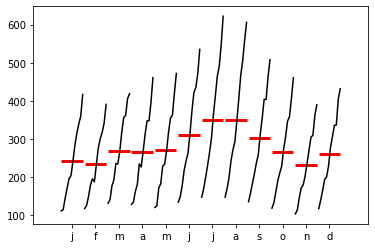

In [50]:
month_plot(df1);

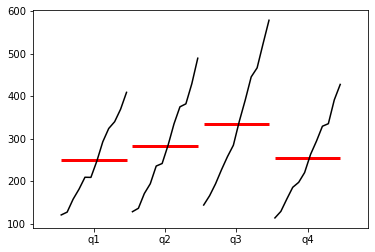

In [52]:
#quarter plot
df1_q=df1['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(df1_q);